## Original Dataset

In [16]:
import imageio
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np
import tifffile as tiff
from skimage.feature import peak_local_max
from skimage.filters import gaussian

In [29]:
tiff_files = [
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_1/1x1_f_28_50_mA_p_stim_1_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_2/1x1_f_28_50_mA_p_stim_2_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_3/1x1_f_28_50_mA_p_stim_3_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_4/1x1_f_28_50_mA_p_stim_4_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_5/1x1_f_28_50_mA_p_stim_5_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_6/1x1_f_28_50_mA_p_stim_6_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_7/1x1_f_28_50_mA_p_stim_7_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_8/1x1_f_28_50_mA_p_stim_8_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_9/1x1_f_28_50_mA_p_stim_9_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_10/1x1_f_28_50_mA_p_stim_10_MMStack_Pos0.ome.tif',
]

In [30]:
# Process each dataset
for idx, file_path in enumerate(tiff_files):
    # Load the TIFF file
    image_stack = tiff.imread(file_path)

In [ ]:
#todo
#signal at the same place, activation map
#average the 10 dataset together
#deepinterpolation and more, use those metrics and quantify the difference between denoised and original data
#SNR, spatial spread, temporal shape and more, read the paper 
#there is a rise, but different frame in than the original data
#read deepinterpolation on how the denoising pic are not degrading the quality

Mean Intensity profile of z profile

In [31]:
import numpy as np

# Assuming image_stack is a NumPy array with shape (frames, height, width)
# Calculate the mean intensity for each frame
mean_intensities = np.mean(image_stack, axis=(1, 2))


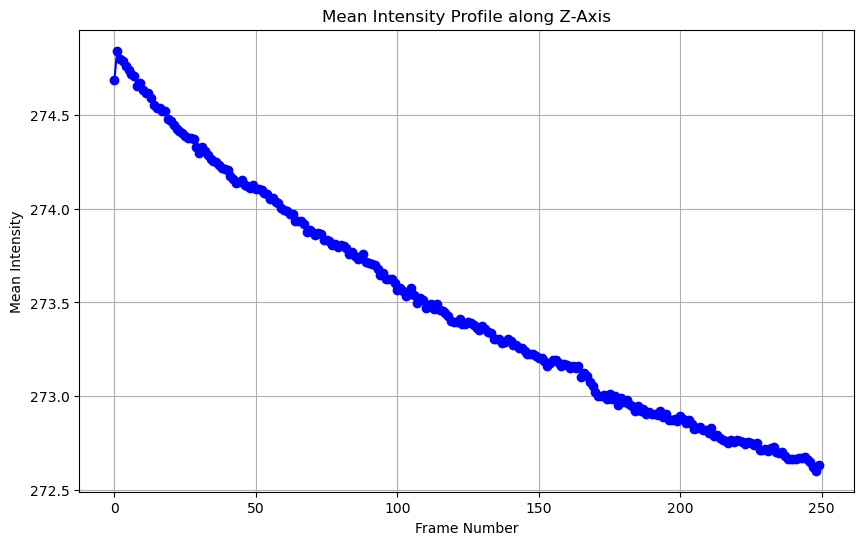

In [32]:
import matplotlib.pyplot as plt

# Generate frame numbers based on the number of frames
frame_numbers = np.arange(image_stack.shape[0])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(frame_numbers, mean_intensities, marker='o', linestyle='-', color='b')
plt.title('Mean Intensity Profile along Z-Axis')
plt.xlabel('Frame Number')
plt.ylabel('Mean Intensity')
plt.grid(True)
plt.show()


Locate the ROI

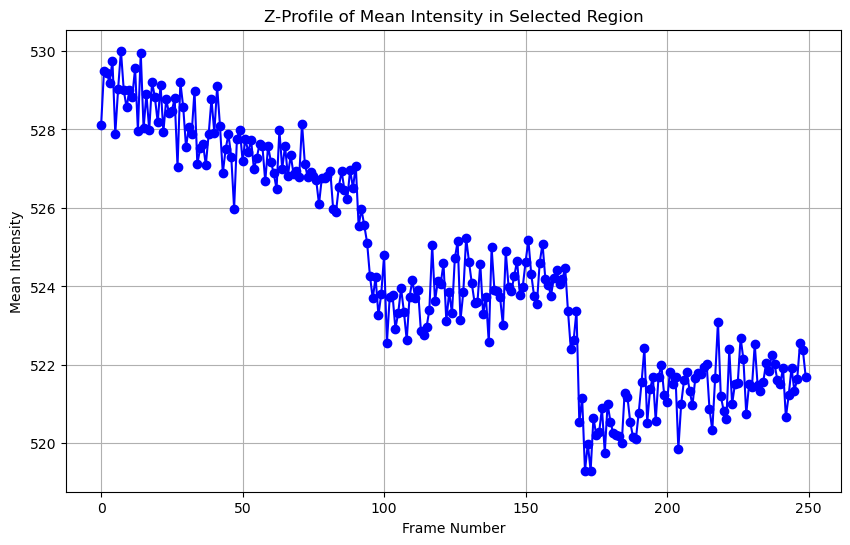

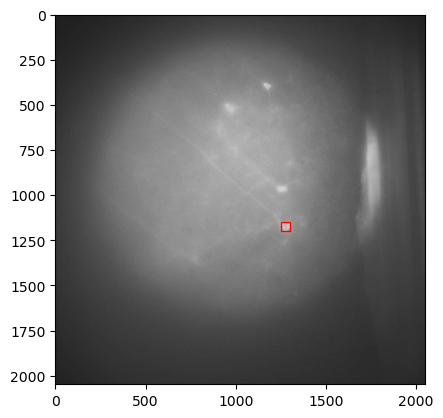

In [33]:

import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff


# Manually define the square region (top left corner x, y, and the size of the region)
top_left_x = 1250  # replace with your value
top_left_y = 1150  # replace with your value
region_size = 50  # replace with your value

# Initialize a list to store the mean intensity for each frame
mean_intensities = []

# Extract the region and calculate the mean intensity for each frame
for frame in image_stack:
    region = frame[top_left_y:top_left_y + region_size, top_left_x:top_left_x + region_size]
    mean_intensity = np.mean(region)
    mean_intensities.append(mean_intensity)

# Generate frame numbers
frame_numbers = np.arange(image_stack.shape[0])

# Plot the z-profile of mean intensity
plt.figure(figsize=(10, 6))
plt.plot(frame_numbers, mean_intensities, marker='o', linestyle='-', color='b')
plt.title('Z-Profile of Mean Intensity in Selected Region')
plt.xlabel('Frame Number')
plt.ylabel('Mean Intensity')
plt.grid(True)
plt.show()

# Plot the first frame with the square region highlighted
plt.imshow(image_stack[0], cmap='gray')
plt.gca().add_patch(plt.Rectangle((top_left_x, top_left_y), region_size, region_size, linewidth=1, edgecolor='r', facecolor='none'))
plt.show()



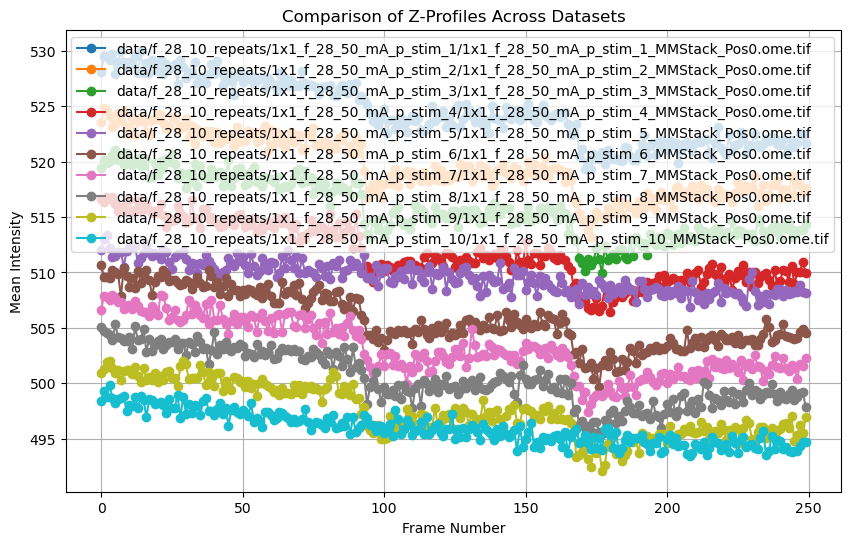

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff

# Manually define the square region (top left corner x, y, and the size of the region)
top_left_x = 1250
top_left_y = 1150
region_size = 50

# Initialize a dictionary to store the mean intensities for each dataset
mean_intensities_dict = {}

# Process each dataset
for idx, file_path in enumerate(tiff_files):
    # Load the TIFF file
    image_stack = tiff.imread(file_path)

    # Extract the region and calculate the mean intensity for each frame
    mean_intensities = [
        np.mean(frame[top_left_y:top_left_y + region_size, top_left_x:top_left_x + region_size])
        for frame in image_stack
    ]

    # Store the mean intensities in the dictionary
    mean_intensities_dict[file_path] = mean_intensities

# Plotting all the z-profiles
plt.figure(figsize=(10, 6))

# Generate frame numbers based on the length of the first dataset
frame_numbers = np.arange(len(next(iter(mean_intensities_dict.values()))))

# Plot each dataset's mean intensities
for file_path, mean_intensities in mean_intensities_dict.items():
    plt.plot(frame_numbers, mean_intensities, marker='o', linestyle='-', label=file_path)

plt.title('Comparison of Z-Profiles Across Datasets')
plt.xlabel('Frame Number')
plt.ylabel('Mean Intensity')
plt.legend()
plt.grid(True)
plt.show()


#1-4,6-9 has drop,5,10 doesnt

Average of the 10 datasets

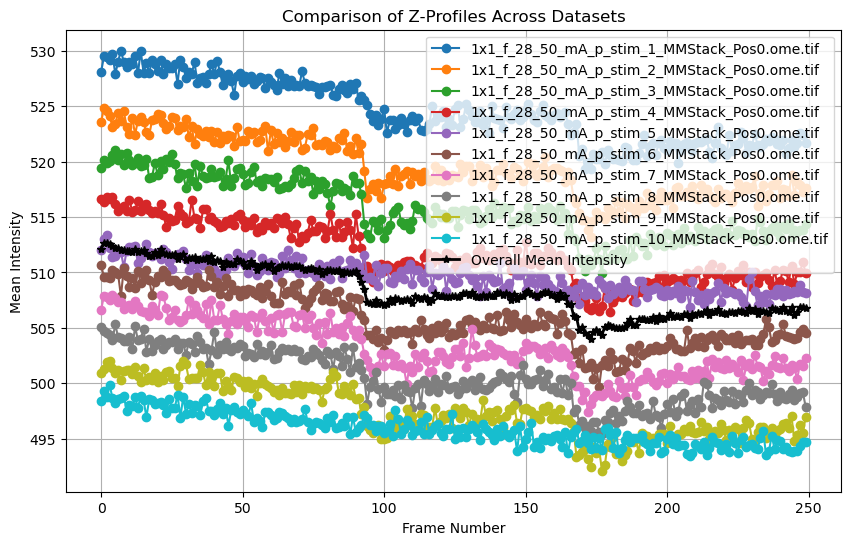

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff

# Plotting all the z-profiles (existing code)
plt.figure(figsize=(10, 6))

# Generate frame numbers based on the length of the first dataset
frame_numbers = np.arange(len(next(iter(mean_intensities_dict.values()))))

# Plot each dataset's mean intensities (existing code)
for file_path, mean_intensities in mean_intensities_dict.items():
    plt.plot(frame_numbers, mean_intensities, marker='o', linestyle='-', label=file_path.split('/')[-1])  # Simplified label for readability

# Calculate the overall mean intensity for each frame across all datasets
overall_mean_intensities = np.mean(list(mean_intensities_dict.values()), axis=0)

# Plot the overall mean intensity
plt.plot(frame_numbers, overall_mean_intensities, marker='*', linestyle='-', linewidth=2, color='black', label='Overall Mean Intensity')

plt.title('Comparison of Z-Profiles Across Datasets')
plt.xlabel('Frame Number')
plt.ylabel('Mean Intensity')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Activation Map

In [5]:
pip install numpy scipy opencv-python scikit-image tifffile matplotlib


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/35/69/b657974ddcbba54d59d7d62b01e60a8b815e35f415b996e4d355be0ac7b4/opencv_python-4.9.0.80-cp37-abi3-macosx_10_16_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 MB 13.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import tifffile as tiff
from scipy.integrate import simps  # Simpson's rule for numerical integration

def integrate_frames(image_stack):
    """
    Integrate the pixel values over time for each pixel in the image stack.

    :param image_stack: A 3D numpy array (time, y, x).
    :return: 2D numpy array representing the integrated activity map.
    """
    # Integrate using Simpson's rule along the time axis (axis=0)
    integrated_image = simps(image_stack, axis=0)
    return integrated_image


In [7]:
activity_maps = []

for file_path in tiff_files:
    image_stack = tiff.imread(file_path)
    activity_map = integrate_frames(image_stack)
    activity_maps.append(activity_map)


In [8]:
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_objects, binary_opening, disk

def isolate_dendrites(activity_map, min_size=100):
    """
    Isolate dendritic structures from an activity map using thresholding and morphological operations.

    :param activity_map: 2D numpy array of the activity map.
    :param min_size: Minimum size of objects to keep.
    :return: Binary mask of isolated dendrites.
    """
    # Apply Otsu's threshold to convert the activity map to a binary image
    thresh = threshold_otsu(activity_map)
    binary_map = activity_map > thresh

    # Morphological opening to remove small artifacts
    selem = disk(2)  # Disk-shaped structuring element with radius 2
    cleaned_map = binary_opening(binary_map, selem)

    # Remove small objects
    isolated_dendrites = remove_small_objects(cleaned_map, min_size=min_size)

    return isolated_dendrites


In [9]:
isolated_dendrites_list = [isolate_dendrites(activity_map) for activity_map in activity_maps]


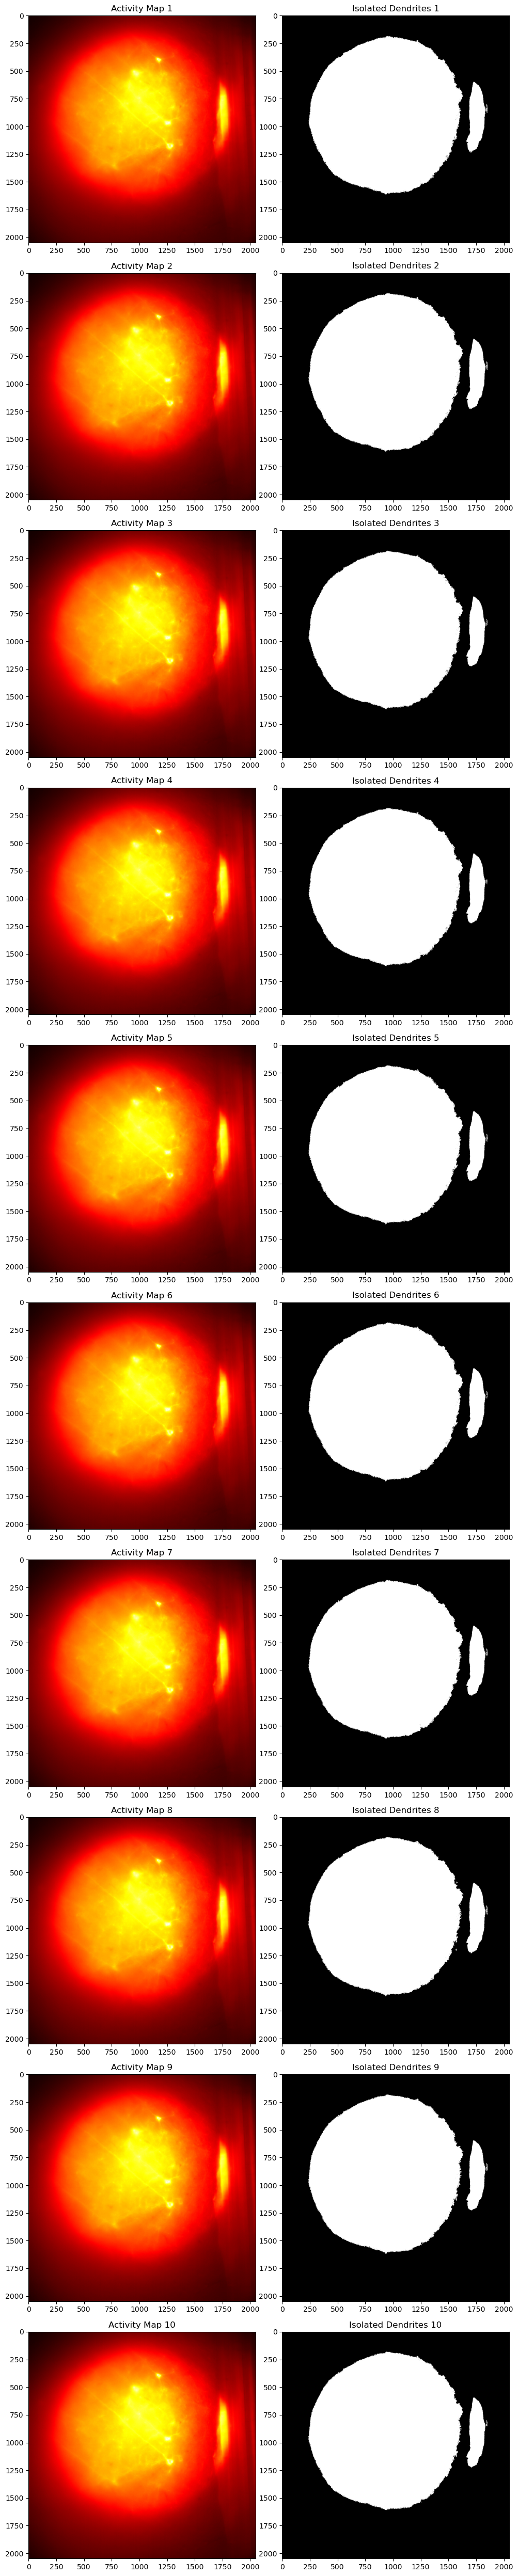

In [10]:
import matplotlib.pyplot as plt

def visualize_maps(activity_maps, isolated_dendrites_list):
    fig, axes = plt.subplots(len(activity_maps), 2, figsize=(10, len(activity_maps) * 5))
    for i, (activity_map, isolated_dendrites) in enumerate(zip(activity_maps, isolated_dendrites_list)):
        if len(activity_maps) > 1:  # Multiple datasets
            ax = axes[i]
        else:  # Single dataset
            ax = axes
        ax[0].imshow(activity_map, cmap='hot')
        ax[0].set_title(f'Activity Map {i+1}')
        ax[1].imshow(isolated_dendrites, cmap='gray')
        ax[1].set_title(f'Isolated Dendrites {i+1}')
    plt.tight_layout()
    plt.show()

visualize_maps(activity_maps, isolated_dendrites_list)


Deconvolved Activation Image

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
from skimage.restoration import richardson_lucy

# Example PSF: you will need to adjust this based on your actual PSF
def estimate_psf(size, sigma=2):
    """Generate a Gaussian PSF."""
    x = np.arange(-size // 2 + 1., size // 2 + 1.)
    y = np.arange(-size // 2 + 1., size // 2 + 1.)
    x, y = np.meshgrid(x, y)
    psf = np.exp(-(x**2 + y**2) / (2.0 * sigma**2))
    psf /= psf.sum()
    return psf

# Assuming the PSF is known or can be estimated
psf = estimate_psf(5)  # Example: 5x5 PSF with a sigma of 2

# Apply Richardson-Lucy deconvolution to each frame
deconvolved_stack = np.array([richardson_lucy(image, psf, 5) for image in image_stack])


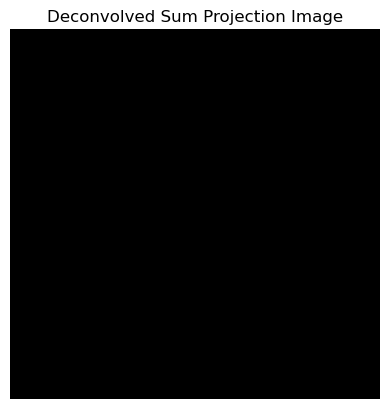

In [42]:
# Define depth range for sum projection
depth_range_microns = (-35, 35)
# Example: Convert depth range in microns to indices (you need to know your imaging depth per slice)
# For this example, let's assume an arbitrary mapping
start_idx = max(0, depth_range_microns[0])  # Adjust based on your actual data
end_idx = min(deconvolved_stack.shape[0], depth_range_microns[1])  # Adjust based on your actual data

# Create sum projection image in the specified depth range
sum_projection_image = np.sum(deconvolved_stack[start_idx:end_idx], axis=0)

# Visualize the sum projection image
plt.imshow(sum_projection_image, cmap='gray')
plt.title('Deconvolved Sum Projection Image')
plt.axis('off')
plt.show()


## Denoised Image

In [19]:
denoised_tiff_files = [
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_1/SUPPORT/20240213_023714/denoised.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_2/SUPPORT/20240308_132035/denoised.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_6/SUPPORT/20240302_224018/denoised.tif',
]

In [20]:
# Process each dataset
for idx, file_path in enumerate(denoised_tiff_files):
    # Load the TIFF file
    denoised_image_stack = tiff.imread(file_path)

In [21]:
import numpy as np

# Assuming image_stack is a NumPy array with shape (frames, height, width)
# Calculate the mean intensity for each frame
mean_intensities = np.mean(denoised_image_stack, axis=(1, 2))

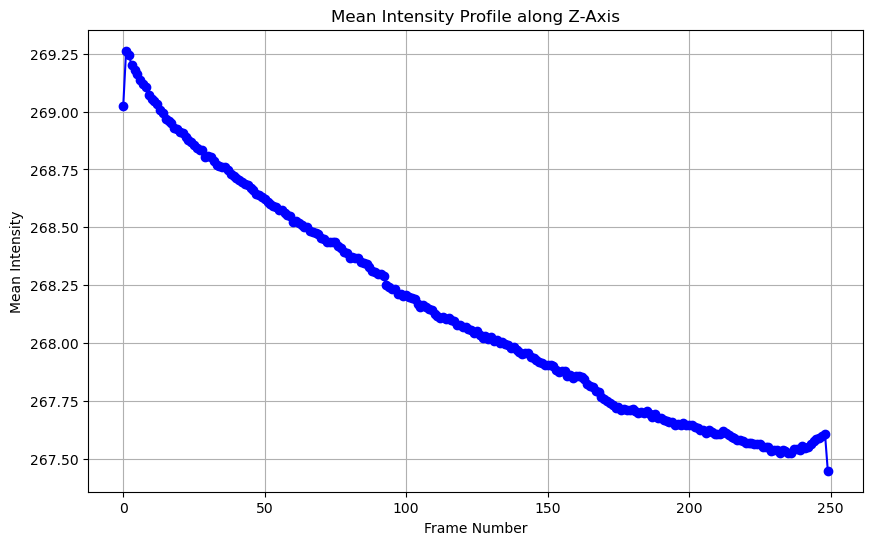

In [23]:
import matplotlib.pyplot as plt

# Generate frame numbers based on the number of frames
frame_numbers = np.arange(denoised_image_stack.shape[0])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(frame_numbers, mean_intensities, marker='o', linestyle='-', color='b')
plt.title('Mean Intensity Profile along Z-Axis')
plt.xlabel('Frame Number')
plt.ylabel('Mean Intensity')
plt.grid(True)
plt.show()

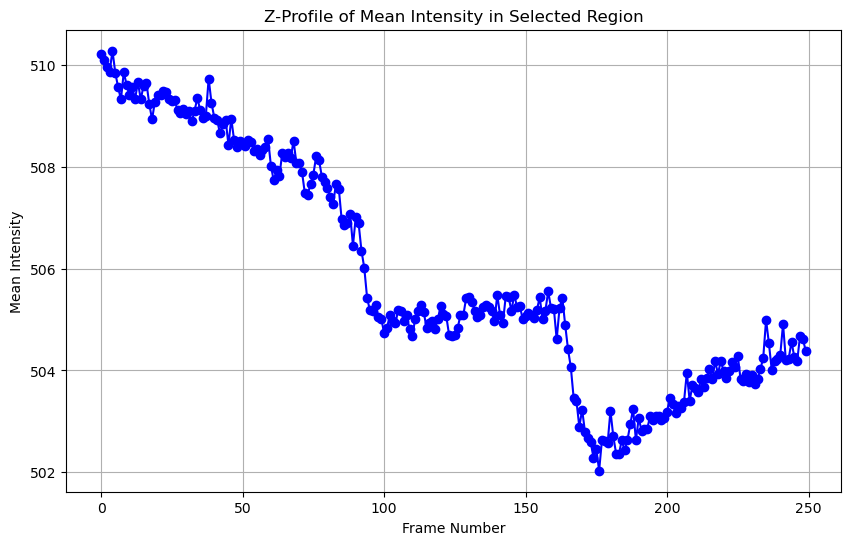

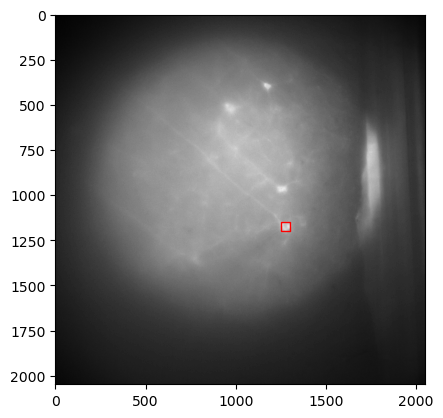

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff


# Manually define the square region (top left corner x, y, and the size of the region)
top_left_x = 1250  # replace with your value
top_left_y = 1150  # replace with your value
region_size = 50  # replace with your value

# Initialize a list to store the mean intensity for each frame
mean_intensities = []

# Extract the region and calculate the mean intensity for each frame
for frame in denoised_image_stack:
    region = frame[top_left_y:top_left_y + region_size, top_left_x:top_left_x + region_size]
    mean_intensity = np.mean(region)
    mean_intensities.append(mean_intensity)

# Generate frame numbers
frame_numbers = np.arange(denoised_image_stack.shape[0])

# Plot the z-profile of mean intensity
plt.figure(figsize=(10, 6))
plt.plot(frame_numbers, mean_intensities, marker='o', linestyle='-', color='b')
plt.title('Z-Profile of Mean Intensity in Selected Region')
plt.xlabel('Frame Number')
plt.ylabel('Mean Intensity')
plt.grid(True)
plt.show()

# Plot the first frame with the square region highlighted
plt.imshow(denoised_image_stack[0], cmap='gray')
plt.gca().add_patch(plt.Rectangle((top_left_x, top_left_y), region_size, region_size, linewidth=1, edgecolor='r', facecolor='none'))
plt.show()


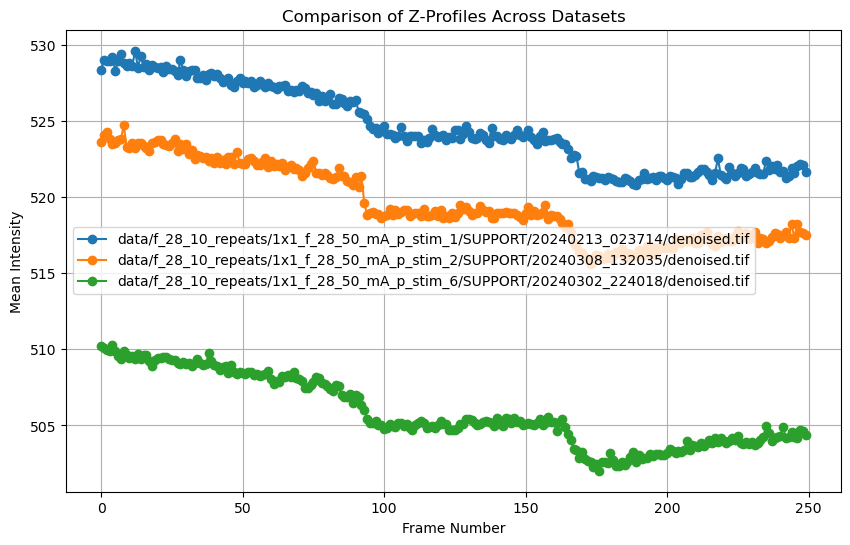

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff

# Manually define the square region (top left corner x, y, and the size of the region)
top_left_x = 1250
top_left_y = 1150
region_size = 50

# Initialize a dictionary to store the mean intensities for each dataset
denoised_mean_intensities_dict = {}

# Process each dataset
for idx, file_path in enumerate(denoised_tiff_files):
    # Load the TIFF file
    denoised_image_stack = tiff.imread(file_path)

    # Extract the region and calculate the mean intensity for each frame
    mean_intensities = [
        np.mean(frame[top_left_y:top_left_y + region_size, top_left_x:top_left_x + region_size])
        for frame in denoised_image_stack
    ]

    # Store the mean intensities in the dictionary
    denoised_mean_intensities_dict[file_path] = mean_intensities

# Plotting all the z-profiles
plt.figure(figsize=(10, 6))

# Generate frame numbers based on the length of the first dataset
frame_numbers = np.arange(len(next(iter(denoised_mean_intensities_dict.values()))))

# Plot each dataset's mean intensities
for file_path, mean_intensities in denoised_mean_intensities_dict.items():
    plt.plot(frame_numbers, mean_intensities, marker='o', linestyle='-', label=file_path)

plt.title('Comparison of Z-Profiles Across Datasets')
plt.xlabel('Frame Number')
plt.ylabel('Mean Intensity')
plt.legend()
plt.grid(True)
plt.show()


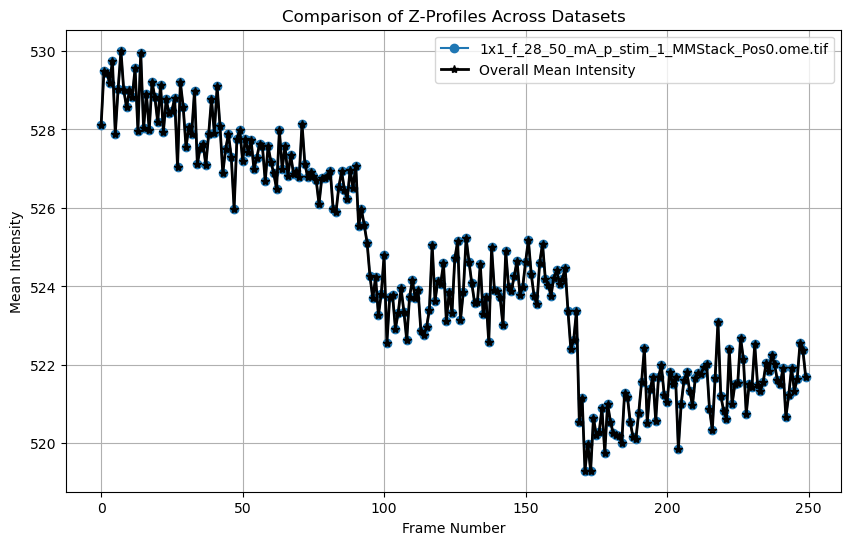

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff

# Plotting all the z-profiles (existing code)
plt.figure(figsize=(10, 6))

# Generate frame numbers based on the length of the first dataset
frame_numbers = np.arange(len(next(iter(mean_intensities_dict.values()))))

# Plot each dataset's mean intensities (existing code)
for file_path, mean_intensities in mean_intensities_dict.items():
    plt.plot(frame_numbers, mean_intensities, marker='o', linestyle='-', label=file_path.split('/')[-1])  # Simplified label for readability

# Calculate the overall mean intensity for each frame across all datasets
overall_mean_intensities = np.mean(list(mean_intensities_dict.values()), axis=0)

# Plot the overall mean intensity
plt.plot(frame_numbers, overall_mean_intensities, marker='*', linestyle='-', linewidth=2, color='black', label='Overall Mean Intensity')

plt.title('Comparison of Z-Profiles Across Datasets')
plt.xlabel('Frame Number')
plt.ylabel('Mean Intensity')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [36]:
denoised_activity_maps = []

for file_path in denoised_tiff_files:
    image_stack = tiff.imread(file_path)
    activity_map = integrate_frames(image_stack)
    denoised_activity_maps.append(activity_map)

denoised_isolated_dendrites_list = [isolate_dendrites(activity_map) for activity_map in denoised_activity_maps]

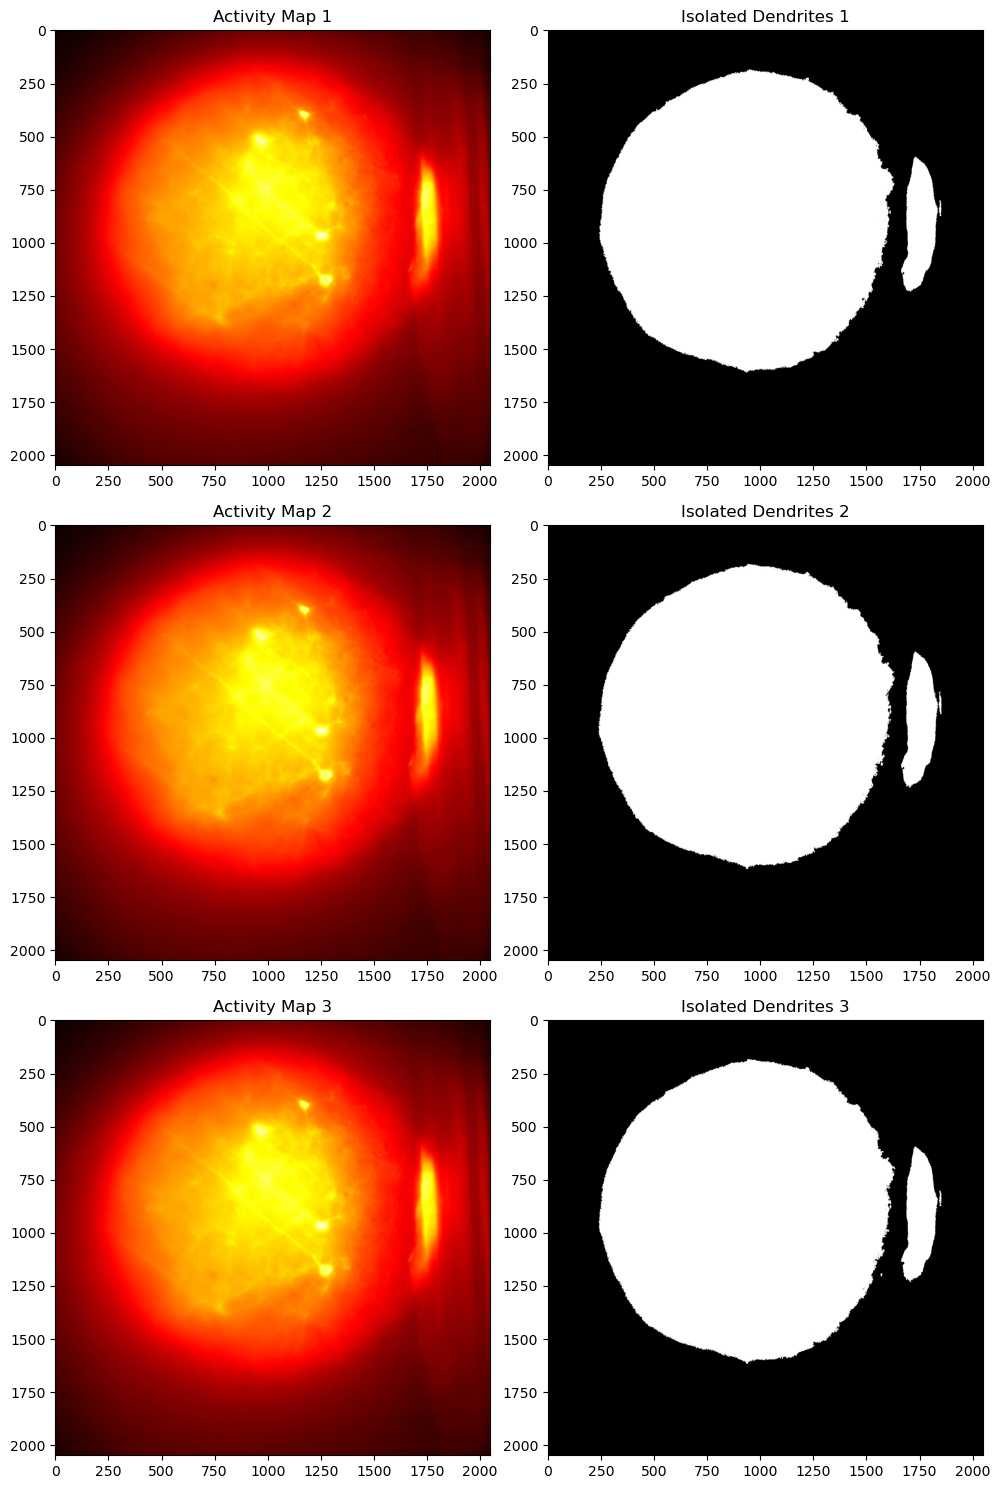

In [37]:
visualize_maps(denoised_activity_maps, denoised_isolated_dendrites_list)

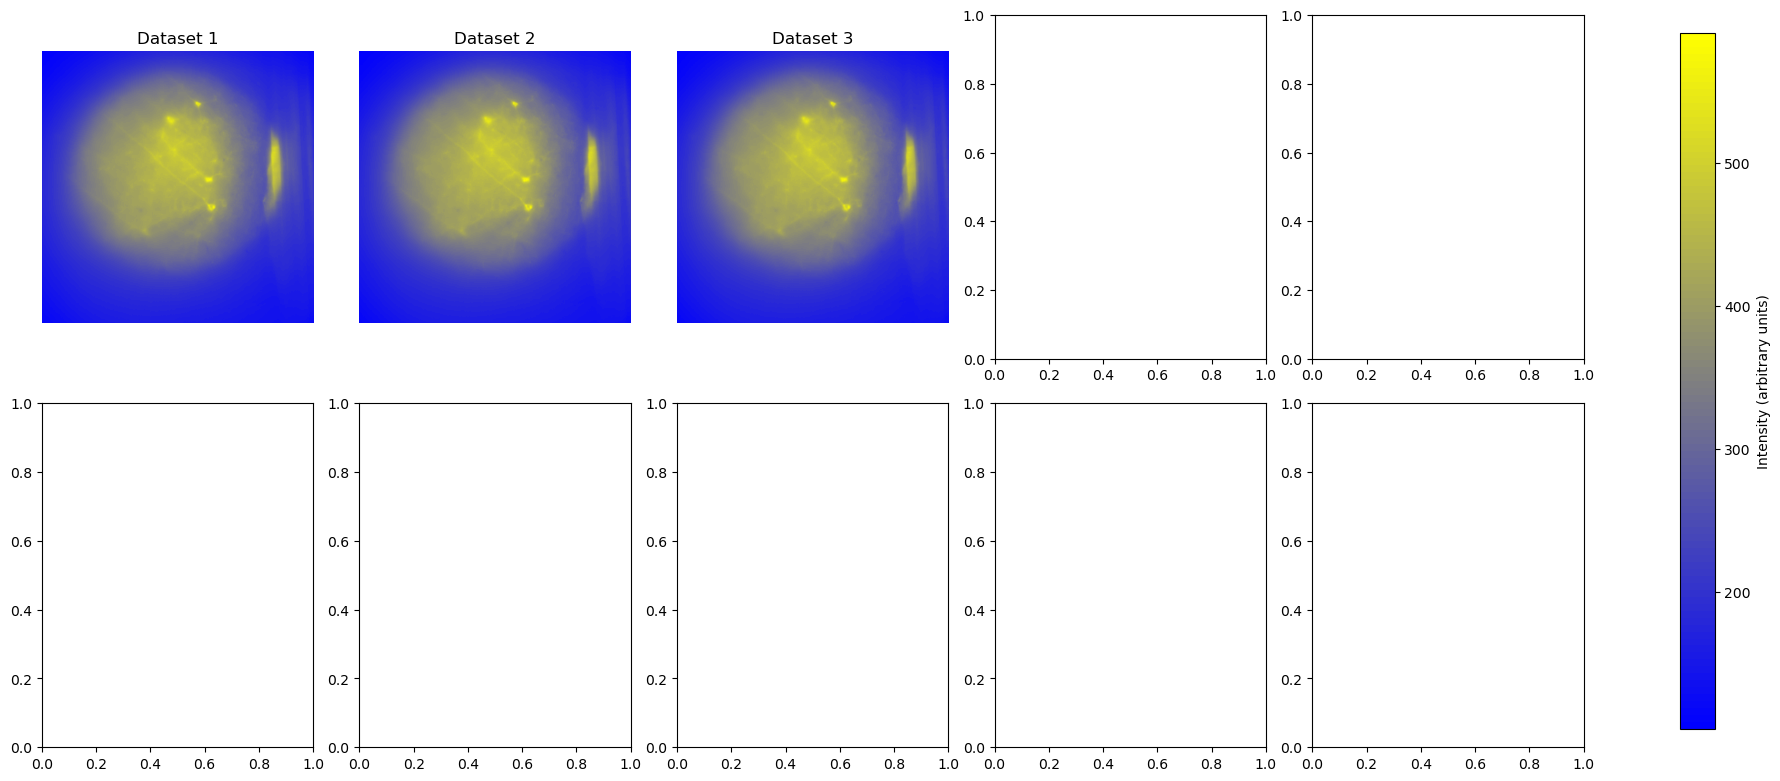

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap from blue (low) to yellow (high)
colors = [(0, 0, 1), (1, 1, 0)]  # Blue to Yellow
n_bins = 100  # Number of bins in the colormap
cmap_name = 'activation_map'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

denoised_tiff_files = ['data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_1/SUPPORT/20240213_023714/denoised.tif',
                       'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_2/SUPPORT/20240308_132035/denoised.tif',
                       'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_6/SUPPORT/20240302_224018/denoised.tif',]

# Plotting setup
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # Adjust grid size based on your number of datasets
axes = axes.ravel()

for idx, file_path in enumerate(denoised_tiff_files):
    # Load the TIFF file
    image = tiff.imread(file_path)
    
    # Assuming the image is a stack, take the mean across all frames to get a single 2D image
    # This step may vary depending on your specific data structure
    if image.ndim > 2:
        image = np.mean(image, axis=0)
    
    # Display the image using the custom colormap
    ax = axes[idx]
    im = ax.imshow(image, cmap=cm)
    ax.set_title(f'Dataset {idx + 1}')
    ax.axis('off')

# Adjust layout
plt.tight_layout()

# Add a colorbar
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95)
cbar.set_label('Intensity (arbitrary units)')

# Show the plot
plt.show()